In [1]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols
from sympy import simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from IPython.display import Latex

# Практическое занятие 12
# Компьютерный практикум по алгебре на Python
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [2]:
from sympy.abc import x, y, z
u = 7 * x ** 2 + 10 * 3 ** (S(1)/2) * x * y - 3 * y ** 2 - 20 * z ** 2
A = Matrix([[7, 5 * 3 ** (S(1)/2), 0], [5 * 3 ** (S(1)/2), -3, 0], [0, 0, -20]])
X = Matrix([x, y, z])
res = X.T * A * X
quadr_form = simplify(expand(res[0]))
display(Latex(f'X = {latex(X)},\ X^T  A  X = {latex(quadr_form)},\ \
X^T  A  X - u = {latex(quadr_form - u)}'))
lambdas = A.eigenvals()
ev = A.eigenvects()
display(Latex(latex(lambdas)))
display(Latex(latex(ev)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [3]:
P = Matrix([Matrix([vect.normalized() for vect in vects]).T for num, multipl, vects in ev]).T
display(Latex(f'A = {latex(A)}, \\ P = {latex(P)}'))
A_new = P.T * A * P
display(Latex(f'A_{{new}} = {latex(simplify(A_new))}'))
res = simplify(expand(X.T * A_new * X))[0]
display(res)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

-20*x**2 - 8*y**2 + 12*z**2

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

In [4]:
A3 = Matrix([[97, -72, 241], [-72, 97, -266], [241, -266, -3452]])
X3 = Matrix([x, y, 1])
display(Latex(f'A_3 = {latex(A3)}, X_3 = {latex(X3)}'))
eq3 = Eq(simplify(expand(X3.T * A3 * X3))[0], 0)
display(eq3)

<IPython.core.display.Latex object>

Eq(97*x**2 - 144*x*y + 482*x + 97*y**2 - 532*y - 3452, 0)

In [5]:
alpha = sympy.acot((A3[0, 0] - A3[1, 1]) / (2 * A3[0, 1])) / 2
P = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])
P.simplify()
A3_new = P.T * A3 * P
A3_new.simplify()
display(Latex(f'P = {latex(P)}, \\ A_{{new3}} = {latex(A3_new)}'))

<IPython.core.display.Latex object>

In [6]:
from sympy.abc import X, Y, Z
X3 = Matrix((X, Y, 1))
display(simplify(expand((X3.T * A3_new * X3)[0])))
X3_new = Matrix((X - A3_new[0, 2] / A3_new[0, 0],
                 Y - A3_new[1, 2] / A3_new[1, 1],
                 1))
eq3_new = simplify(expand(X3_new.T * A3_new * X3_new))[0]
display(Latex(f'X_{{3\ new}} = {latex(X3_new)},\ \
eq_{{3\ new}} = {latex(eq3_new)}'))
free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new / (-free) + 1
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
display(eq3_last_xy)

25*X**2 - 25*sqrt(2)*X + 169*Y**2 - 507*sqrt(2)*Y - 3452

<IPython.core.display.Latex object>

Eq(x**2/169 + y**2/25, 1)

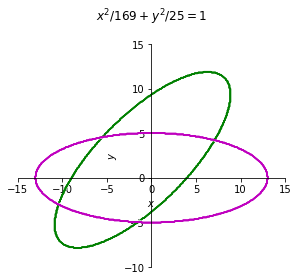

In [7]:
p = plot_implicit(eq3, (x, -15, 15), (y, -10, 15), line_color='g', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$', 
                   title=f'{latex(eq3_last_xy, mode="inline")}\n',
                   adaptive=False, show=False)
p.extend(plot_implicit(eq3_last_xy, (x, -15, 15), (y, -10, 15), line_color='m',
                       aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()

### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

In [8]:
A4 = Matrix([[1, 1, -2], [1, 1, 2], [-2, 2, -4]])
X4 = Matrix([x, y, 1])
display(Latex(f'A_4 = {latex(A4)}, X_4 = {latex(X4)}'))
eq4 = Eq(simplify(expand(X4.T * A4 * X4))[0], 0)
display(eq4)

<IPython.core.display.Latex object>

Eq(x**2 + 2*x*y - 4*x + y**2 + 4*y - 4, 0)

In [9]:
alpha = sympy.acot((A4[0, 0] - A4[1, 1]) / (2 * A4[0, 1])) / 2
P4 = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])
P4.simplify()
A4_new = P4.T * A4 * P4
A4_new.simplify()
display(Latex(f'P = {latex(P4)}, \\ A_{{new4}} = {latex(A4_new)}'))

<IPython.core.display.Latex object>

In [10]:
from sympy.abc import X, Y, Z
X4 = Matrix((X, Y, 1))
eq4 = expand((X4.T * A4_new * X4)[0])
eq4_y = Eq(y, min(solveset(eq4, Y).subs({X: x})))
display(eq4_y)

Eq(y, -sqrt(2)*(x**2 - 2)/4)

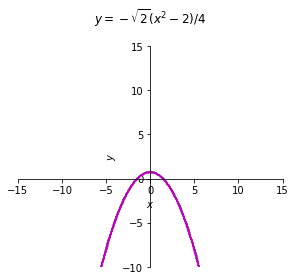

In [11]:
p = plot_implicit(eq4_y, (x, -15, 15), (y, -10, 15), line_color='g', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$', 
                   title=f'{latex(eq4_y, mode="inline")}\n',
                   adaptive=False, show=False)
p.extend(plot_implicit(eq4_y, (x, -15, 15), (y, -10, 15), line_color='m',
                       aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

$$Q = - 5851 x^{2} + 30 \sqrt{11} x y - 1596 \sqrt{6} x z + 1275 y^{2} - 60 \sqrt{66} y z + 3326 z^{2}$$

In [12]:
A0 = Matrix([[-5851, 15*11**(S(1)/2), -798*6**(S(1)/2)], [15*11**(S(1)/2), 1275, -30*66**(S(1)/2)], [-798*6**(S(1)/2), -30*66**(S(1)/2), 3326]])
X0 = Matrix([x, y, z])
display(Latex(f'A_0 = {latex(A0)}, X_0 = {latex(X0)}'))
eq0 = Eq(simplify(expand(X0.T * A0 * X0))[0], 0)
display(eq0)

<IPython.core.display.Latex object>

Eq(-5851*x**2 + 30*sqrt(11)*x*y - 1596*sqrt(6)*x*z + 1275*y**2 - 60*sqrt(66)*y*z + 3326*z**2, 0)

In [13]:
ev0 = A0.eigenvects()
P0 = Matrix([Matrix([vect.normalized() for vect in vects]).T for num, multipl, vects in ev0]).T
P0.simplify()
A0_new = P0.T * A0 * P0
A0_new.simplify()
display(Latex(f'A0 = {latex(A0)}, \\ P = {latex(P0)}, \\ A_{{new0}} = {latex(A0_new)}'))
res = simplify(expand(X0.T * A0_new * X0))[0]
display(res)

<IPython.core.display.Latex object>

-6250*x**2 + 1250*y**2 + 3750*z**2